# Dealing with Data: April 25, 2019

## Introduction to Pandas and Matplotlib

In [1]:
import pandas as pd # Pandas = 'Python Data Analysis Library' (https://pandas.pydata.org/)
import matplotlib  # A 2D plotting library (https://matplotlib.org/)
import matplotlib.pyplot as plt
import seaborn as sns # Statistical data visualization (https://seaborn.pydata.org/)

### If you don't have Pandas installed, not a problem, just create a new cell below and type the following: 

!sudo python3 -m pip install -U pandas

----

## Let's get started with Data Frames, a table structure of rows and columns used in Pandas

In [2]:
# We begin by creating a new data frame using pd.DataFrame

# We are then going to use a 'list of dictionaries', which we'll touch on briefly

df = pd.DataFrame([ 
    {"First Name": "Alex", "Last Name": "Siegman"}, 
    {"First Name": "John", "Last Name": "Doe"}
])

In [3]:
df

,First Name,Last Name
0,Alex,Siegman
1,John,Doe


### Let's dig a bit deeper to understand what just happened

In [4]:
dictionary = {"First Name": "Alex", "Last Name": "Siegman"}
               # <key>     <value>     <key>      <value>

In [5]:
dictionary['First Name']

'Alex'

In [6]:
dictionary['Last Name']

'Siegman'

In [7]:
df[0] # note that this will give us an error

KeyError: 0

In [8]:
df['First Name'] # this is how we get what we need

0    Alex
1    John
Name: First Name, dtype: object

## So that's all a data frame is, it's a table of rows and columns! 

---

## Now, let's begin to delve further into Pandas with a different data set. 

In [9]:
!mkdir -p data # 'mkdir' = 'make directory' 
               # '-p' means it will create a 'nested directory', aka, it will create 'data' within current directory
               # in total, this command creates a folder called 'data' under the current folder
               # p.s., to check your current folder, open a new cell and type '!pwd' (print working directory)

!rm -f data/restaurant.csv* # 'rm' = 'remove'
                            # '-f' means 'force', aka, it will bypass permission checks
                            # 'data/restaurant.csv*' means we want to remove any file in our data directory that ends with 'resturant.csv'
                            # in total, this command removes any prior file, if it exists

!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
                            # 'curl' is a tool to transfer eata from or to a server
                            # for more on 'curl' visit (https://curl.haxx.se/docs/manpage.html)

!gzip data/restaurant.csv # compress the file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  133M    0  133M    0     0  3786k      0 --:--:--  0:00:36 --:--:-- 3176k     0  4260k      0 --:--:--  0:00:11 --:--:-- 4359k


### Please note that some operating systems don't allow for the bash commands (those '!'s' above), so below is an alternative option.

In [9]:
import os 

path = os.getcwd() # this is the equivalent of 'pwd' (print working directory) in Linux. Just figuring out where we are right now on our machine.
print(path)

/Users/alexsiegman/Desktop/Dealing with Data April 25, 2019


In [17]:
import requests

url = "https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD"
r = requests.get(url, allow_redirects=True)
open('restaurantdata','wb').write(r.content)

140382306

### Now that we have our data on our desktop (or wherever else we deem appropriate on our machine...)

In [10]:
restaurants = pd.read_csv('/Users/siegmanA/Desktop/restaurant.csv.gz', 
                         encoding = 'utf-8', # for more on UTF-8 check (https://www.w3schools.com/charsets/ref_html_utf8.asp)
                         dtype = 'unicode', # we are telling Pandas to read our data as data type object 'Unicode' which will make it a string
                         parse_dates = True, # parse our dates that are coming in as strings, as specified above
                         infer_datetime_format = True, # we are asking Pandas to infer the format of the datetime strings in the column so as to increase parsing speed
                         low_memory = False) # normally Pandas will try to automatically detrmine the dtype, which takes lots of memory

---

### For column definitions check out https://data.cityofnewyork.us/api/views/43nn-pn8j

---

In [11]:
restaurants.head() # show us the first five rows of our data frame

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5,A,05/11/2018,04/21/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5,A,05/11/2018,04/21/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7,A,05/18/2017,04/21/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7,A,05/18/2017,04/21/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10,A,02/18/2016,04/21/2019,Cycle Inspection / Initial Inspection


### Now that we have successfully read our CSV, let's look at some basic data analysis...

In [12]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,383726,383233,383726,383498,383725,378132,383685,383726,383726,382466,377964,375374,383726,365494,193257,190774,383726,382466
unique,27000,21287,6,7303,3267,226,25477,84,1401,5,99,91,3,133,7,1310,1,32
top,41683816,DUNKIN' DONUTS,MANHATTAN,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,07/10/2018,04/21/2019,Cycle Inspection / Initial Inspection
freq,87,3822,152412,2180,14186,10111,198,82682,1260,359363,54160,54160,209639,39853,153338,508,383726,224263


In [13]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383726 entries, 0 to 383725
Data columns (total 18 columns):
CAMIS                    383726 non-null object
DBA                      383233 non-null object
BORO                     383726 non-null object
BUILDING                 383498 non-null object
STREET                   383725 non-null object
ZIPCODE                  378132 non-null object
PHONE                    383685 non-null object
CUISINE DESCRIPTION      383726 non-null object
INSPECTION DATE          383726 non-null object
ACTION                   382466 non-null object
VIOLATION CODE           377964 non-null object
VIOLATION DESCRIPTION    375374 non-null object
CRITICAL FLAG            383726 non-null object
SCORE                    365494 non-null object
GRADE                    193257 non-null object
GRADE DATE               190774 non-null object
RECORD DATE              383726 non-null object
INSPECTION TYPE          382466 non-null object
dtypes: object(18)
memory

### Note that above all of our data is stored as a non-null object, aka, a string. 

### But 'Score' is not a string, it's a numerical value. So let's work to alter that in our data frame.

In [14]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
# we are setting the value of our column equal to itself, but now with the caveat that we want it converted 'to numeric'

restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [15]:
restaurants.SCORE.describe() # let's get some more info on our "SCORE" column...

count    365494.000000
mean         19.778563
std          14.153974
min          -1.000000
25%          11.000000
50%          15.000000
75%          25.000000
max         156.000000
Name: SCORE, dtype: float64

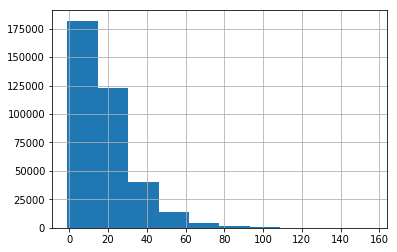

In [16]:
restaurants["SCORE"].hist()

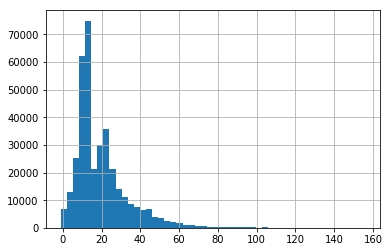

In [17]:
restaurants["SCORE"].hist(bins=50) # let's change the default number of bins

## Let's take a moment to explore what else we can customize in our histogram

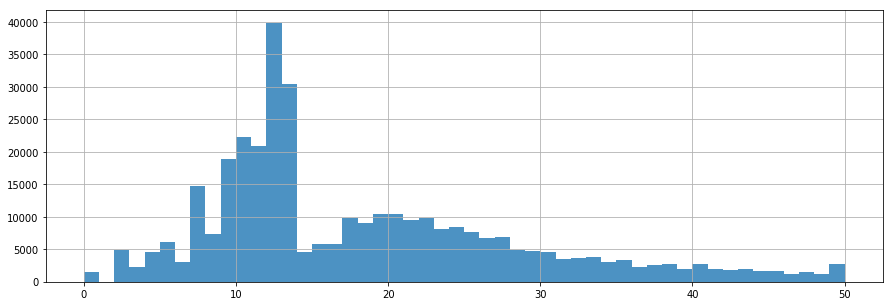

In [18]:
restaurants["SCORE"].hist(bins=50, # use 50 bins
                      range=(0,50), # our x-axis will range from 0 to 50
                      density=False, # show the raw count; to show normalized count use (density=True)
                      figsize=(15,5), # control the size of the plot
                      alpha = 0.8 # make plot 20% transparent
                      )

## We can also use KDE (kernel density estimation) to estimate a continuous function, instead of bucketized as above.

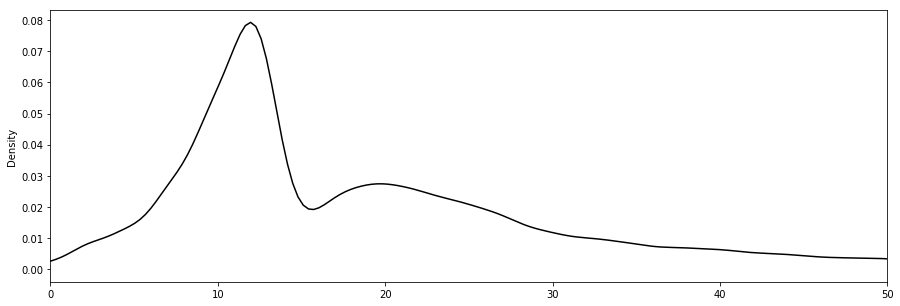

In [19]:
restaurants["SCORE"].plot(
    kind = 'kde',
    color = 'Black', 
    xlim = (0, 50),
    figsize = (15, 5)
)

---

## Now let's do some work with dates

In [20]:
restaurants["GRADE DATE"].head(10) # show us the first ten values of this column

0    05/11/2018
1    05/11/2018
2    05/18/2017
3    05/18/2017
4    02/18/2016
5    02/18/2016
6    03/04/2019
7    03/04/2019
8    03/04/2019
9    03/13/2018
Name: GRADE DATE, dtype: object

### Note that our dates are stored as strings, which doesn't really help us. So, we can convert all of our dates using the 'to_datetime' function, and format them as illustrated below

In [21]:
# %m Month as a zero-padded decimal number
# %d Day of month as a zero-padded decimal number
# %y Year with century as a decimal number

restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [22]:
restaurants.dtypes # let's check to make sure our code above worked...

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [23]:
restaurants[["INSPECTION DATE","GRADE DATE","RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,383726,190774,383726
unique,1401,1310,1
top,1900-01-01 00:00:00,2018-07-10 00:00:00,2019-04-21 00:00:00
freq,1260,508,383726
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2019-04-21 00:00:00
last,2019-04-19 00:00:00,2019-04-18 00:00:00,2019-04-21 00:00:00


# Exercise 1: Plot a histogram of our dates

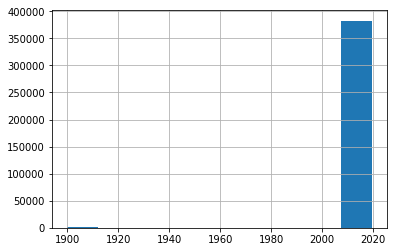

In [24]:
restaurants["INSPECTION DATE"].hist()

# Exericse 2: Change the number of bins in our histogram

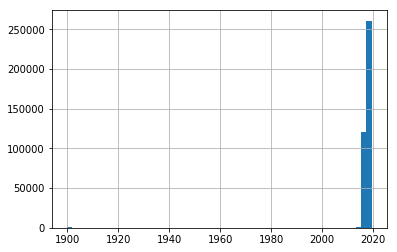

In [25]:
restaurants["INSPECTION DATE"].hist(bins=60)

# Exercise 3: Focus on the dates 1/1/2014 thru 05/31/2018

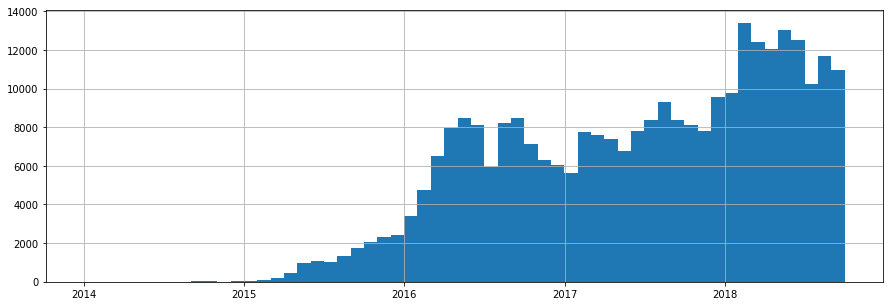

In [26]:
restaurants["INSPECTION DATE"].hist(
    range = ('1/1/2014', '9/30/2018'),
    bins = 57, # number of months in the range, computed manually
    figsize = (15,5)
)

## Now that we've worked with dates, let's look at categorical values...

### Sometimes we need categorical values, when we have a variable that has an implicit order, for instance an 'ABC' grade (as we do in our restaurants data set)

In [27]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False) 
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
# 'ordered=True' means that we are saying there are three categories, and 'A' > 'B' > 'C', in that order
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

## Let's delve into a particular column, 'CUISINE DESCRIPTION'

In [28]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5] # give us the 'value_counts' of the first five columns

American                                                            82682
Chinese                                                             39890
CafÃ©/Coffee/Tea                                                    18128
Pizza                                                               17100
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16586
Name: CUISINE DESCRIPTION, dtype: int64

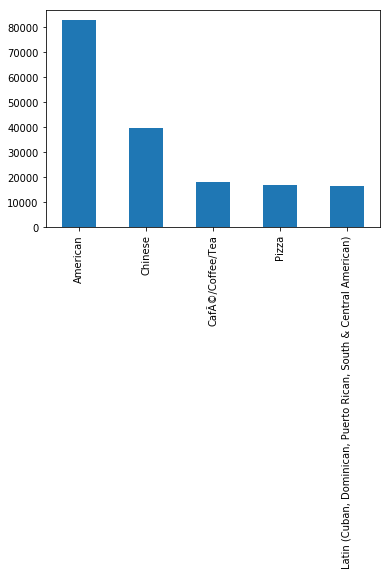

In [29]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

### ^ That is super ugly. Let's shorten the name of 'Latin (Cuban, Dominican...' because it is messing up our formatting.

In [30]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)', # replace this...
    value = 'Latin American', # with this
    inplace=True # inplace=True means we change direclty the dataframe instead of returning a ndw df qithout the deleted value
)

### While we're at it, let's fix the formattig in 'Cafe/Coffee/Tea'

In [31]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea', # replace this
    value = 'Cafe/Coffee/Tea', # with this
    inplace=True
)

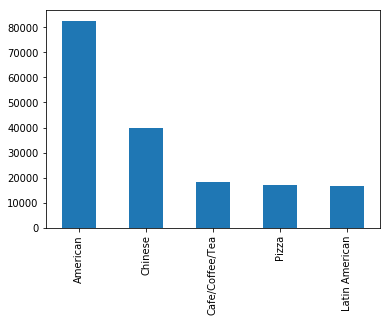

In [32]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

# Exercise 4: What are the 10 most common violation codes? 

In [33]:
violation_counts = restaurants["VIOLATION CODE"].value_counts(); 

violation_counts[0:10]

10F    54160
08A    41334
04L    28607
06D    26192
06C    24989
10B    22762
02G    21985
02B    19957
04N    19394
04H     8074
Name: VIOLATION CODE, dtype: int64

# Exercise 5: Plot the 10 most common violation codes as a bar chart

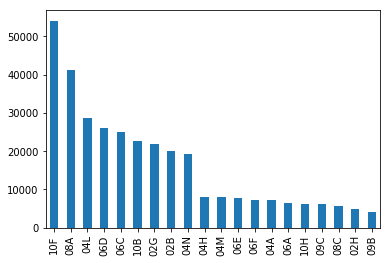

In [34]:
violation_counts[0:20].plot(kind='bar')

# Exercise 6: Plot the numer of inspections across each bourough

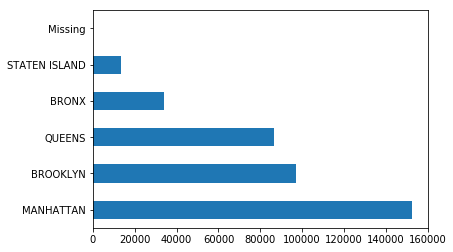

In [35]:
restaurants["BORO"].value_counts().plot(kind='barh') # the 'h' makes it horizontal

## Imagine we want to get a subset of our data frame based on the columns we're interested in.

In [36]:
columns = ["GRADE DATE","VIOLATION CODE","DBA","SCORE"] # create a list of the columns we're interested in 
restaurants[columns].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,2018-05-11,08C,MORRIS PARK BAKE SHOP,5.0
1,2018-05-11,10F,MORRIS PARK BAKE SHOP,5.0
2,2017-05-18,06D,MORRIS PARK BAKE SHOP,7.0
3,2017-05-18,10F,MORRIS PARK BAKE SHOP,7.0
4,2016-02-18,04L,MORRIS PARK BAKE SHOP,10.0
5,2016-02-18,08A,MORRIS PARK BAKE SHOP,10.0
6,2019-03-04,02G,WENDY'S,13.0
7,2019-03-04,10B,WENDY'S,13.0
8,2019-03-04,10F,WENDY'S,13.0
9,2018-03-13,04L,WENDY'S,12.0


## What if instead we wanted to select the rows we're interested in? 

### Well, to do that, we can generate a list of boolean (True or Fale) values, one for each row of our Data Frame, then use a list to see which rows to keep. 

### In this case, '04L' is the code for 'has mice'


In [37]:
mice = restaurants["VIOLATION CODE"] == "04L"

mice

0         False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9          True
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
          ...  
383696    False
383697    False
383698    False
383699    False
383700    False
383701    False
383702    False
383703    False
383704    False
383705    False
383706    False
383707    False
383708    False
383709    False
383710    False
383711    False
383712    False
383713    False
383714    False
383715    False
383716    False
383717    False
383718    False
383719    False
383720    False
383721    False
383722    False
383723    False
383724    False
383725    False
Name: VIOLATION CODE, Le

In [38]:
has_mice = restaurants[mice] # let's apply this new condition to our original df ('restaurants') and store the result 
                             # in a new data frame called 'has_mice'

has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,2016-02-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2016-02-18,2019-04-21,Cycle Inspection / Initial Inspection
9,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2018-03-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2018-03-13,2019-04-21,Cycle Inspection / Initial Inspection
29,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2018-05-16,2019-04-21,Cycle Inspection / Initial Inspection
57,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,2016-05-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2016-05-14,2019-04-21,Cycle Inspection / Initial Inspection
61,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234,7184443838,Delicatessen,2017-06-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2017-06-03,2019-04-21,Cycle Inspection / Initial Inspection
67,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2018-05-16,2019-04-21,Cycle Inspection / Initial Inspection
71,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2017-06-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2017-06-22,2019-04-21,Cycle Inspection / Initial Inspection
105,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2017-04-20,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2017-04-20,2019-04-21,Cycle Inspection / Re-inspection
108,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2017-03-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection
113,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2016-08-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2016-08-29,2019-04-21,Cycle Inspection / Re-inspection


# Exercise 7: Which restaurants have the most mice complaints? 

In [39]:
has_mice["DBA"].value_counts()[:20] # "DBA" represents the name 'Doing Business As" of the entity'

SUBWAY                                   232
DUNKIN' DONUTS                           143
KENNEDY FRIED CHICKEN                    120
CROWN FRIED CHICKEN                      104
STARBUCKS                                 83
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     82
DOMINO'S                                  73
MCDONALD'S                                68
POPEYES LOUISIANA KITCHEN                 63
DUNKIN' DONUTS, BASKIN ROBBINS            54
BURGER KING                               52
KFC                                       41
CARVEL ICE CREAM                          34
LITTLE CAESARS                            32
LE PAIN QUOTIDIEN                         31
AMC THEATRES                              29
VIVI BUBBLE TEA                           26
16 HANDLES                                22
EMPANADAS MONUMENTAL                      21
PAPA JOHN'S                               21
Name: DBA, dtype: int64

# Exercise 8: Let's pull up all of Subway's mice complaints

In [40]:
has_mice.loc[has_mice["DBA"]=="SUBWAY"]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
39991,40827907,SUBWAY,QUEENS,7072,KISSENA BOULEVARD,11367,7187935666,Sandwiches,2016-11-02,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2016-11-02,2019-04-21,Cycle Inspection / Initial Inspection
43860,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2019-01-24,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,41.0,NaN,NaT,2019-04-21,Cycle Inspection / Re-inspection
43863,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2019-01-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection
43868,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2018-08-27,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2018-08-27,2019-04-21,Cycle Inspection / Re-inspection
43871,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2018-08-02,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection
43879,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2018-01-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,B,2018-01-18,2019-04-21,Cycle Inspection / Re-inspection
43883,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2017-12-08,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection
43888,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2017-04-26,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,22.0,B,2017-04-26,2019-04-21,Cycle Inspection / Re-inspection
43892,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2017-04-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,28.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection
43901,40881793,SUBWAY,QUEENS,14604,JAMAICA AVENUE,11435,7182975060,Sandwiches,2016-05-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2019-04-21,Cycle Inspection / Initial Inspection


---

## Now let's do some work with Pivot Tables

### First, let's count the number of restaurants inspected every day

In [41]:
pivot = pd.pivot_table(
    data=restaurants,
    index = "INSPECTION DATE", # specifies rows
    values = "CAMIS", # specifies content of cells
    aggfunc = "count" # ask to count how many different CAMIS values we see
)

In [42]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,1260
2011-10-07,1
2012-05-01,2
2013-04-19,4
2013-06-07,1
2013-06-10,4
2013-06-15,1
2013-10-22,2
2013-11-15,1


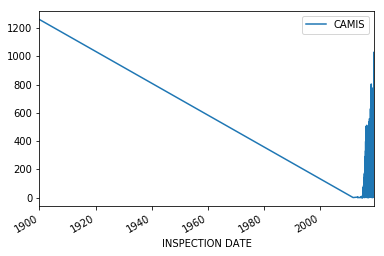

In [43]:
pivot.plot() 

In [44]:
pivot.head()

,CAMIS
INSPECTION DATE,
1900-01-01,1260
2011-10-07,1
2012-05-01,2
2013-04-19,4
2013-06-07,1


### It looks like that 1900-01-01 value is really throwing us off. Let's get rid of it. 

In [45]:
pivot.drop(pd.to_datetime('1900-01-01'),axis='index',inplace=True)

# we use pd.to_datetime to convert '1900-01-01' string to a datetime data type
# we use axis='index' to specify that we mean delete a row with that index value

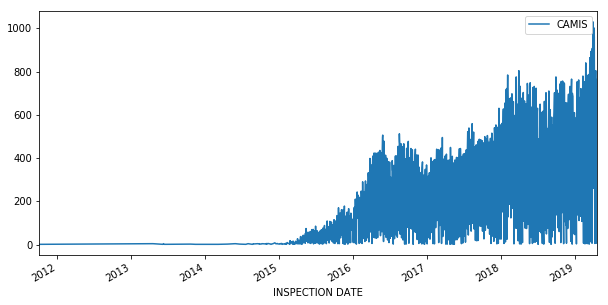

In [46]:
pivot.plot(figsize=(10,5))

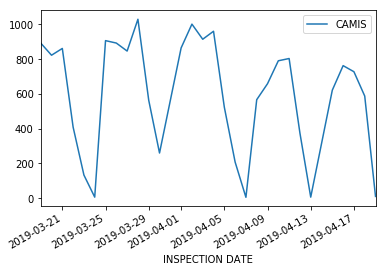

In [47]:
pivot.tail(30).plot() # let's look at the last 30 days

In [48]:
pivot.resample('1W').mean().tail(10) # use resample command to change frequency from one to 7 days, then compute the 
                                     # mean for these days (aka, the sum of total inspections)


,CAMIS
INSPECTION DATE,
2019-02-17,460.285714
2019-02-24,491.000000
2019-03-03,473.285714
2019-03-10,471.857143
2019-03-17,536.285714
2019-03-24,564.857143
2019-03-31,750.166667
2019-04-07,640.000000
2019-04-14,533.666667


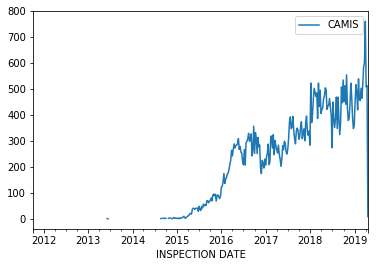

In [49]:
pivot.resample('7D').mean().plot() # plot the number of inspections over 7 days

# Exercise 9: Plot the total number of inspections over 1 month

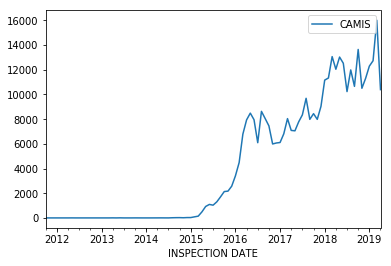

In [50]:
pivot.resample('1M').sum().plot()

## We can also add some basic titles to our plot.

Text(0.5, 1.0, 'Analysis of Number of Inspections over Time')

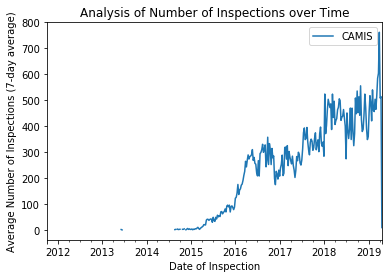

In [51]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

# Exercise 10: Create a pivot table where we break down the results by boro

In [52]:
boro_pivot = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

boro_pivot.tail(10)

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,,
2019-04-09,76.0,162.0,162.0,NaN,215.0,44.0
2019-04-10,43.0,223.0,258.0,NaN,219.0,48.0
2019-04-11,59.0,243.0,226.0,NaN,207.0,69.0
2019-04-12,20.0,76.0,173.0,NaN,97.0,9.0
2019-04-13,NaN,6.0,NaN,NaN,NaN,NaN
2019-04-15,19.0,129.0,393.0,NaN,73.0,8.0
2019-04-16,111.0,274.0,188.0,NaN,173.0,17.0
2019-04-17,10.0,233.0,293.0,NaN,179.0,13.0
2019-04-18,36.0,185.0,188.0,NaN,170.0,9.0


# Exercise 11: Delete the first row

In [53]:
boro_pivot = boro_pivot.drop(pd.to_datetime('1900-01-01'),axis='index') # index means we delete row with that index value

## We can also take a moment to get rid of our 'Missing' column 

In [54]:
boro_pivot = boro_pivot.drop('Missing',axis='columns')

boro_pivot.tail()

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,
2019-04-15,19.0,129.0,393.0,73.0,8.0
2019-04-16,111.0,274.0,188.0,173.0,17.0
2019-04-17,10.0,233.0,293.0,179.0,13.0
2019-04-18,36.0,185.0,188.0,170.0,9.0
2019-04-19,NaN,NaN,10.0,NaN,NaN


---

---

# Let's now take some time to explore Matplotlib

---

---

In [55]:
%matplotlib inline 
# the '%' is an example of a 'magic command' that allows us to make use of matplotlibs interactivity

import matplotlib.pyplot as plt
import numpy as np

In [56]:
np.random.normal(size=10)

array([ 0.5636553 ,  0.21737783, -0.08081254,  0.73619659,  0.66033277,
       -2.4518617 ,  0.47518907, -0.66095326,  0.27143314, -1.81563361])

In [57]:
t = np.arange(0., 5., 0.1) # every sampled value between 0 and 5, at .2 intervals

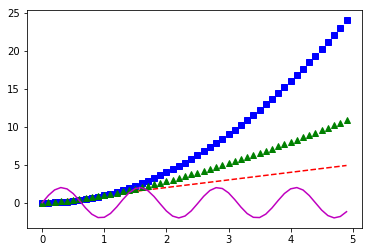

In [58]:
import math 

plt.plot(t, t, 'r--') # plot t as is with red dashes
plt.plot(t, t**2, 'bs') # plot t**2 with blue squares
plt.plot(t, t**1.5, 'g^') # plot t**1.5 with green triangles
plt.plot(t, 2*np.sin(5*t), 'm-') # plot 2**sin(5*t) with magenta line
plt.show()

### Note, there are lots of predefined styles available, too


In [59]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


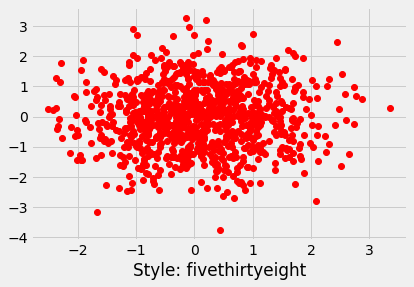

In [60]:
xvalues = np.random.normal(size=1000) # an array of 1,000 floats
yvalues = np.random.normal(size=1000) # an array of 1,000 floats

plt.style.use(u'fivethirtyeight')
plt.plot(xvalues, yvalues, 'ro')
plt.xlabel("Style: fivethirtyeight")
plt.show()

## Let's break down all the possibilities with Matplotlib

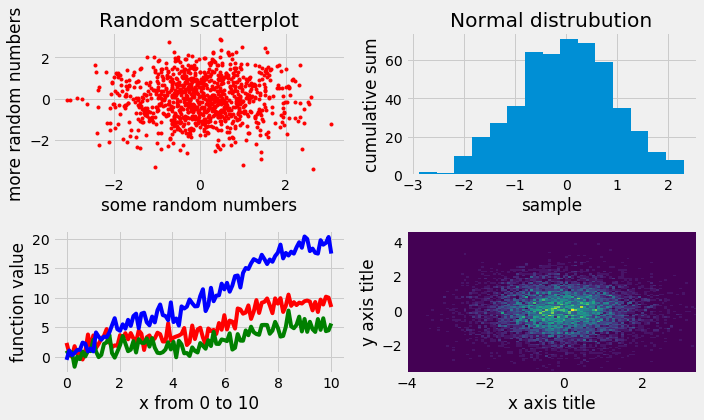

In [61]:
fig = plt.figure(figsize=(10,6))

# Create the first subfigure
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('some random numbers')
sub1.set_ylabel('more random numbers')
sub1.set_title("Random scatterplot")
sub1.plot(np.random.randn(1000), np.random.randn(1000), 'r.')

# Create the second subfigure
sub2 = fig.add_subplot(2,2,2)
sub2.hist(np.random.normal(size=500), bins=15)
sub2.set_xlabel('sample')
sub2.set_ylabel('cumulative sum')
sub2.set_title("Normal distrubution")

# Create the third subfigure
numpoints = 100
x = np.linspace(0, 10, num=numpoints)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(x, np.sin(x) + x + np.random.randn(numpoints), "r")
sub3.plot(x, np.sin(x) + 0.5 * x + np.random.randn(numpoints), "g")
sub3.plot(x, np.sin(x) + 2 * x + np.random.randn(numpoints), "b")
sub3.set_xlabel('x from 0 to 10')
sub3.set_ylabel('function value')

# Create the fourth subfigure
sub4 = fig.add_subplot(2,2,4)
x = np.random.randn(10000)
y = np.random.randn(10000)
sub4.hist2d(x,y,bins=100);
sub4.set_xlabel('x axis title')
sub4.set_ylabel('y axis title')

plt.tight_layout()
plt.savefig("normalvars.png", dpi=150)

### A bit more on what can be done...

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a011320>,
      dtype=object)

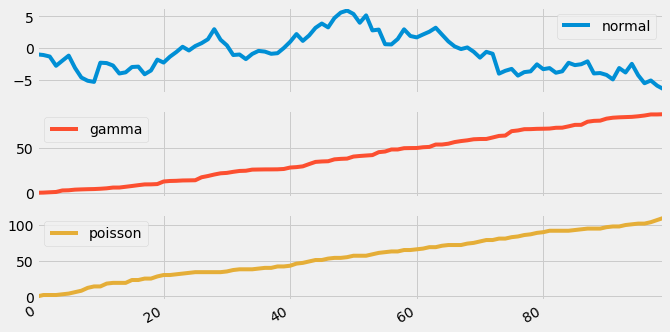

In [63]:
# We can split multiple series into subplots with a single argument

variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})

variables.cumsum(0).plot(subplots=True,figsize=(10,6))

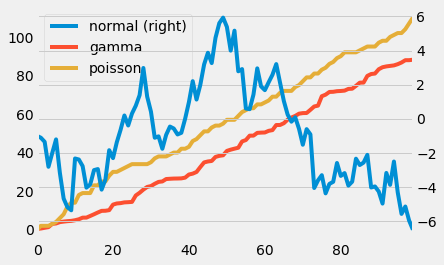

In [64]:
# Or, have some series displayed on secondary y-axis

variables.cumsum(0).plot(secondary_y='normal')

Text(0, 0.5, 'cumulative sum (poisson)')

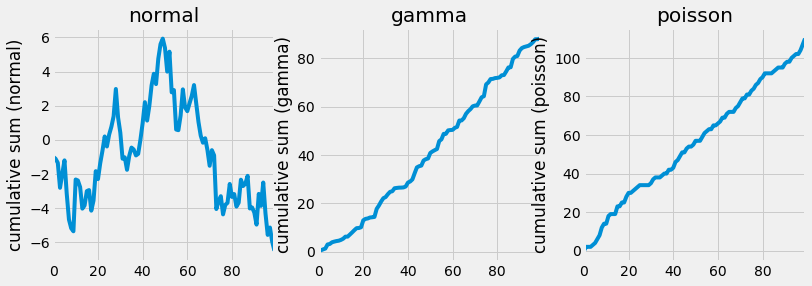

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum (normal)')
axes[1].set_ylabel('cumulative sum (gamma)')
axes[2].set_ylabel('cumulative sum (poisson)')

## Let's check out a new data set

In [66]:
titanic = pd.read_csv('/Users/siegmanA/Desktop/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [67]:
titanic.groupby('Pclass').Survived.sum() # How many survivors are there based on passenger class? 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

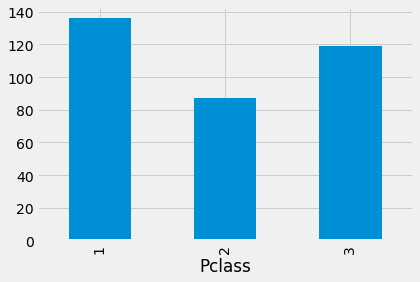

In [68]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

In [69]:
titanic.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.137026
Name: Survived, dtype: float64

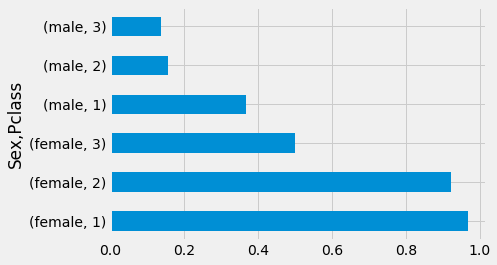

In [70]:
titanic.groupby(['Sex','Pclass']).Survived.mean().plot(kind='barh')

In [71]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      296     47

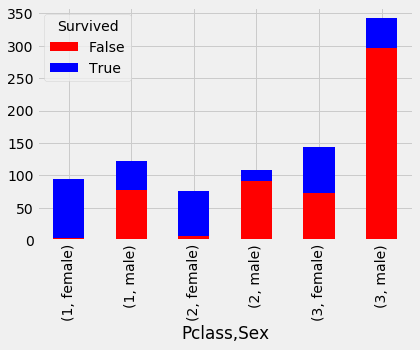

In [72]:
death_counts.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

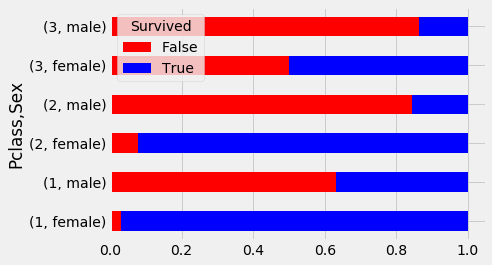

In [73]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['red','blue'])

---

## Histograms

---

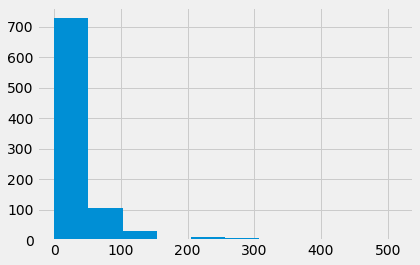

In [74]:
# How were fares distributed aboard the titanic? 

titanic["Fare"].hist()

# Exercise 13: How do we divide our histogram into 30 bins? 

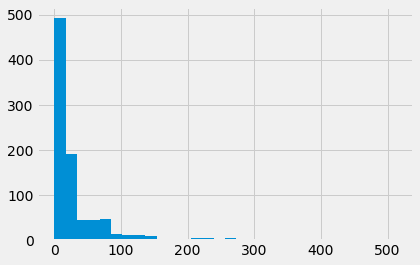

In [75]:
titanic["Fare"].hist(bins=30)

---

## Density Plots

### Rather than purely represent the underlying data, this is an _estimate_ of the underlying true distribution.

---

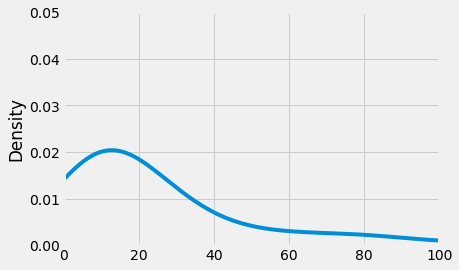

In [76]:
titanic["Fare"].plot(kind='kde', xlim=(0,100), ylim=(0,0.05))

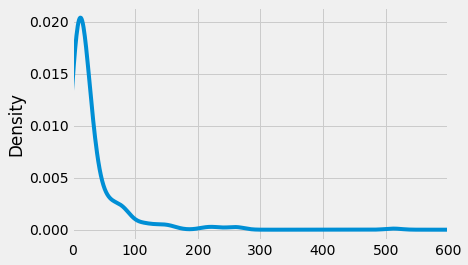

In [77]:
titanic["Fare"].plot(kind='kde', xlim=(0,600)) # notice what happens when we change our xlim

---

## Boxplots

### Think of a boxplot as viewing the data 'from above'. 

---

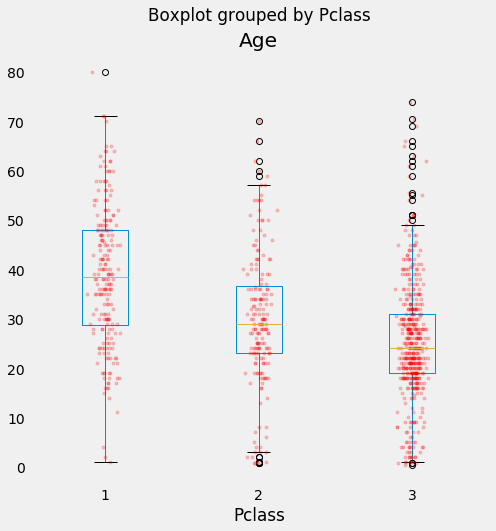

In [78]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    x = np.random.normal(i, 0.04, size=len(y)) # Add some random "jitter" to the x-axis

    plt.plot(x, y, 'r.', alpha=0.2)

---

## Scatterplots

---

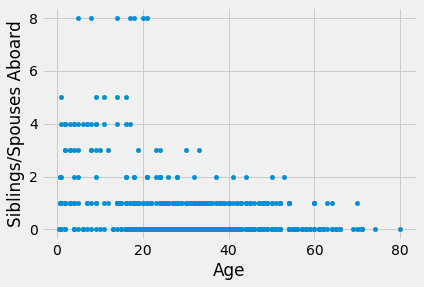

In [79]:
fig = titanic.plot(kind="scatter", x='Age', y='Siblings/Spouses Aboard')

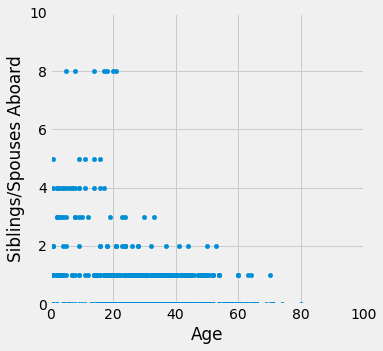

In [80]:
fig = titanic.plot(kind="scatter", x='Age', y='Siblings/Spouses Aboard',xlim=[0,100], ylim=[0,10],figsize=(5,5))

### We can even go so far as to assign variables to either the size or symbols of their colors

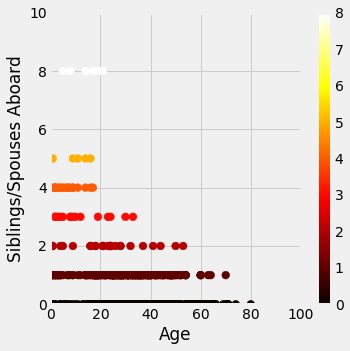

In [81]:
fig = titanic.plot(kind='scatter', x='Age', y='Siblings/Spouses Aboard', xlim=[0,100], ylim=[0,10], 
                    figsize=(5,5), c=titanic['Siblings/Spouses Aboard'], s=60, cmap='hot')

---

## Hexagonal Bin Plot

### This is perfect for when you have a larger number of points to display. It's also useful if your data are too dense to plot each point individually in a scatter plot.

---

In [82]:
df = pd.DataFrame( np.random.randn(10000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(10000)

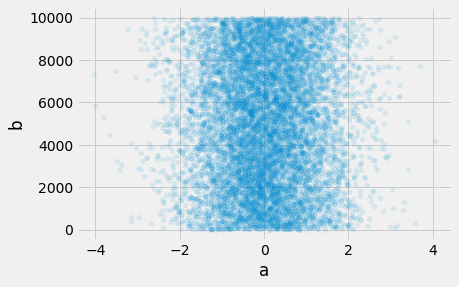

In [83]:
df.plot(kind='scatter', x='a', y='b', figsize=(6,4), alpha=0.1)

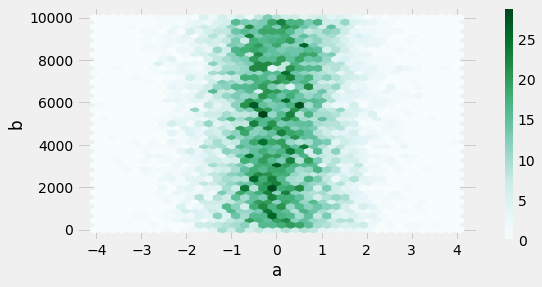

In [84]:
df.plot(kind='hexbin', x='a', y='b', gridsize=40,figsize=(8,4))

----